In [8]:
import numpy as np
import matplotlib.pyplot as plt

from algorithm import SGD
from optimizers import *
from loss import MSE, CrossEntropyLoss
from models import CustomLinearRegression, LogisticRegressionBC

# Linear Regression Test

In [9]:
k = 5
theta = np.random.rand(k + 1)

X_train = np.random.rand(100, k)

y_train = np.concatenate([X_train, np.ones((100, 1))], -1) @ theta
theta

array([0.63944487, 0.03381941, 0.36322895, 0.4325542 , 0.99208422,
       0.64293714])

In [10]:
opts = {
        "ConstantLROptimizer" : ConstantLROptimizer(1e-3),
        "Adam": Adam(),
        "AdaGrad": AdaGrad()
}

Optimizer ConstantLROptimizer : diff = 0.2179245976012779
Optimizer Adam : diff = 0.5185377633084428
Optimizer AdaGrad : diff = 0.3189792025796316


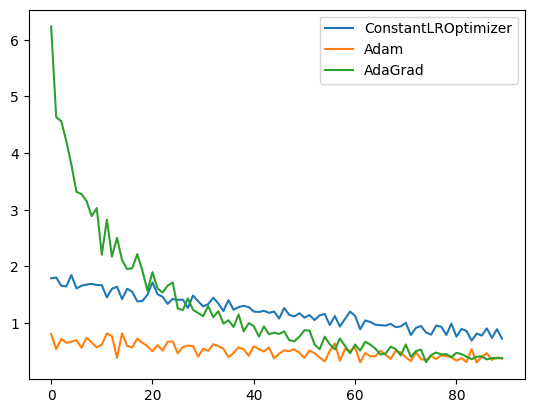

In [11]:
mse_loss = MSE()
loss_hist = dict()
preds_hist = dict()

for name, opt in opts.items():
  lm = CustomLinearRegression(k)
  opt.set_learning_params(lm.weights)

  loss_hist[name] = SGD(X_train, y_train, lm, mse_loss, opt, n_epochs=30,
                        batch_size=40
                        )


  print(f"Optimizer {name} : diff = {mse_loss.compute(lm.weights, theta)}")

  plt.plot(loss_hist[name], label=name)

plt.legend()
plt.show()

# Logistic Regression Test

In [12]:
from scipy.special import expit 

k = 3
theta = np.random.rand(k + 1)

X_train = np.random.normal(0, 1, (100, k))

y_train = expit(np.concatenate([X_train, np.ones((100, 1))], -1) @ theta + np.random.normal(0, 1e-1, 100)) > 0.5
theta

array([0.04926868, 0.26164629, 0.5739185 , 0.25000148])

In [ ]:
opts = {
        "ConstantLROptimizer" : ConstantLROptimizer(1e-3),
        "Adam": Adam(),
        "AdaGrad": AdaGrad()
}

Optimizer ConstantLROptimizer : accuracy = 0.62 diff = 0.270846977441624
Optimizer Adam : accuracy = 0.85 diff = 0.13678477340669976
Optimizer AdaGrad : accuracy = 0.91 diff = 0.19063063179929474


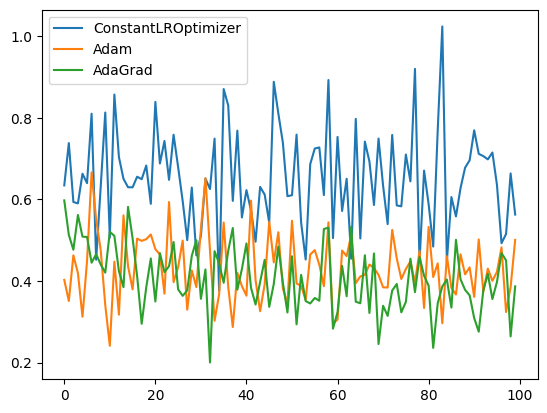

In [14]:
ce_loss = CrossEntropyLoss()
loss_hist = dict()
preds_hist = dict()

for name, opt in opts.items():
  lm = LogisticRegressionBC(k)
  opt.set_learning_params(lm.weights)

  loss_hist[name] = SGD(X_train, y_train, lm, ce_loss, opt, n_epochs=10,
                        batch_size=10
                        )

  preds = lm.predict(X_train) > 0.5
  print(f"Optimizer {name} : accuracy = {np.mean(preds == y_train)} diff = {mse_loss.compute(lm.weights, theta)}")

  plt.plot(loss_hist[name], label=name)

plt.legend()
plt.show()